In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import io
df_cases=pd.read_csv('CasosPositivosCOVID-19_7Enero.csv',dtype={ 
                                                                'ID de caso':str,
                                                                'Código DIVIPOLA departamento':str,
                                                                'Nombre departamento':str,    
                                                                'Código DIVIPOLA municipio':str,    
                                                                'Nombre municipio':str,         
                                                                'Edad':int,        
                                                                'Unidad de medida de edad':str,     
                                                                'Sexo':str,     
                                                                'Código ISO del país':str,    
                                                                'Nombre del país':str,    
                                                                'Recuperado':str,    
                                                                'Tipo de recuperación':str,       
                                                                'Pertenencia étnica':str,       
                                                                'Nombre del grupo étnico':str
                                                                },low_memory=False)
df_cases.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,...,380,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,"76,111",BUGA,34,1,M,...,724,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,"5,001",MEDELLIN,50,1,F,...,724,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,"5,001",MEDELLIN,55,1,M,...,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,"5,001",MEDELLIN,25,1,M,...,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6,NaN


df_cases=pd.to_datetime([['fecha reporte web',
                          'Fecha de notificación',    
                          'Fecha de inicio de síntomas',       
                          'Fecha de muerte',
                          'Fecha de diagnóstico',
                          'Fecha de recuperación'
                        ]])

In [3]:
df_cases['Nombre departamento'].drop_duplicates()

0                 BOGOTA
1                  VALLE
2              ANTIOQUIA
6              CARTAGENA
11                 HUILA
14                  META
27             RISARALDA
29       NORTE SANTANDER
30                CALDAS
44          CUNDINAMARCA
58          BARRANQUILLA
59             SANTANDER
75               QUINDIO
87                TOLIMA
120                CAUCA
154       STA MARTA D.E.
212                CESAR
221           SAN ANDRES
228             CASANARE
313               NARIÑO
420            ATLANTICO
444               BOYACA
546              CORDOBA
605              BOLIVAR
668                SUCRE
716            MAGDALENA
819              GUAJIRA
2626               CHOCO
3438            AMAZONAS
3592             CAQUETA
10495           PUTUMAYO
11796             ARAUCA
12265             VAUPES
25313            GUAINIA
25659            VICHADA
38038           GUAVIARE
Name: Nombre departamento, dtype: object

In [4]:
df_cases.dropna()
df_cases

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,...,380,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,"76,111",BUGA,34,1,M,...,724,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,"5,001",MEDELLIN,50,1,F,...,724,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,"5,001",MEDELLIN,55,1,M,...,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,"5,001",MEDELLIN,25,1,M,...,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719766,6/1/2021 0:00:00,"1,719,807",23/12/2020 0:00:00,25,CUNDINAMARCA,"25,126",CAJICA,19,1,M,...,NaN,NaN,Activo,19/12/2020 0:00:00,NaN,3/1/2021 0:00:00,NaN,NaN,NaN,NaN
1719767,6/1/2021 0:00:00,"1,719,808",22/12/2020 0:00:00,25,CUNDINAMARCA,"25,175",CHIA,19,1,M,...,NaN,NaN,Activo,18/12/2020 0:00:00,NaN,2/1/2021 0:00:00,NaN,NaN,NaN,NaN
1719768,6/1/2021 0:00:00,"1,719,809",22/12/2020 0:00:00,25,CUNDINAMARCA,"25,175",CHIA,21,1,M,...,NaN,NaN,Activo,18/12/2020 0:00:00,NaN,2/1/2021 0:00:00,NaN,NaN,NaN,NaN
1719769,6/1/2021 0:00:00,"1,719,810",20/12/2020 0:00:00,85,CASANARE,"85,001",YOPAL,19,1,M,...,NaN,NaN,Activo,14/12/2020 0:00:00,NaN,31/12/2020 0:00:00,NaN,NaN,NaN,NaN


#Exportar a Excel
pruebasdataset=df_cases.tail(10000)
#exportar=pd.ExcelWriter("PruebasDataset.csv")
pruebasdataset.to_csv('C:/Users/PC/Documents/VsCode/ArchivosPython/Jupiter/pruebasdataset.csv', index=False,header=True)
#exportar.save()

NORMALIZACION DATAFRAME CASES  DEPARTAMENTO

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='ANTIOQUIA':
        nom=1
        return nom
    else:
        nom=0
df_cases.loc[:,['ANTIOQUIA']]=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='ATLANTICO':
        nom=1
        return nom
    else:
        nom=0
df_cases.loc[:,['ATLANTICO']]=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='BOGOTA':
        nom=1
        return nom
    else:
        nom=0
df_cases['BOGOTA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='BOLIVAR':
        nom=1
        return nom
    else:
        nom=0
df_cases['BOLIVAR']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='BOYACA':
        nom=1
        return nom
    else:
        nom=0
df_cases['BOYACA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='CALDAS':
        nom=1
        return nom
    else:
        nom=0
df_cases['CALDAS']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='CAQUETA':
        nom=1
        return nom
    else:
        nom=0
df_cases['CAQUETA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='CAUCA':
        nom=1
        return nom
    else:
        nom=0
df_cases['CAUCA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='CESAR':
        nom=1
        return nom
    else:
        nom=0
df_cases['CESAR']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='CORDOBA':
        nom=1
        return nom
    else:
        nom=0
df_cases['CORDOBA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='CUNDINAMARCA':
        nom=1
        return nom
    else:
        nom=0
df_cases['CUNDINAMARCA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='CHOCO':
        nom=1
        return nom
    else:
        nom=0
df_cases['CHOCO']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='HUILA':
        nom=1
        return nom
    else:
        nom=0
df_cases['HUILA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='LA GUAJIRA':
        nom=1
        return nom
    else:
        nom=0
df_cases['LA GUAJIRA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='MAGDALENA':
        nom=1
        return nom
    else:
        nom=0
df_cases['MAGDALENA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='META':
        nom=1
        return nom
    else:
        nom=0
df_cases['META']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='NARIÑO':
        nom=1
        return nom
    else:
        nom=0
df_cases['NARIÑO']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='NORTE DE SANTANDER':
        nom=1
        return nom
    else:
        nom=0
df_cases['NORTE DE SANTANDER']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='QUINDIO':
        nom=1
        return nom
    else:
        nom=0
df_cases['QUINDIO']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='RISARALDA':
        nom=1
        return nom
    else:
        nom=0
df_cases['RISARALDA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='SANTANDER':
        nom=1
        return nom
    else:
        nom=0
df_cases['SUCRE']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='TOLIMA':
        nom=1
        return nom
    else:
        nom=0
df_cases['TOLIMA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='VALLE DEL CAUCA':
        nom=1
        return nom
    else:
        nom=0
df_cases['VALLE DEL CAUCA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='ARAUCA':
        nom=1
        return nom
    else:
        nom=0
df_cases['ARAUCA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='CASANARE':
        nom=1
        return nom
    else:
        nom=0
df_cases['CASANARE']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='PUTUMAYO':
        nom=1
        return nom
    else:
        nom=0
df_cases['PUTUMAYO']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='SAN ANDRES':
        nom=1
        return nom
    else:
        nom=0
df_cases['SAN ANDRES']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='AMAZONAS':
        nom=1
        return nom
    else:
        nom=0
df_cases['AMAZONAS']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='GUAINIA':
        nom=1
        return nom
    else:
        nom=0
df_cases['GUAINIA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='GUAVIARE':
        nom=1
        return nom
    else:
        nom=0
df_cases['GUAVIARE']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='VAUPES':
        nom=1
        return nom
    else:
        nom=0
df_cases['VAUPES']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='VICHADA':
        nom=1
        return nom
    else:
        nom=0
df_cases['VICHADA']=df_cases.apply(departamento,axis=1)

NORMALIZACION CIUDAD

NORMALIZACION DATAFRAME CASES GENERO

In [5]:
def generof(fila):
    sexf=fila['Sexo']
    if sexf =='F':
        resultado=1
        return resultado
    else:
        resultado=0
        return resultado
df_cases['Femenino']=df_cases.apply(generof,axis=1)

In [6]:
def generom(fila):
    sexm=fila['Sexo']
    if sexm =='M':
        respuesta=1
        return respuesta
    else:
        respuesta=0
        return respuesta
df_cases['Masculino']=df_cases.apply(generom,axis=1)

#df_cases.head()
#df_cases.dtypes
#df_cases.fillna(0)
#df_cases.dropna()
#type(df_cases)
#df_cases.describe()
df_cases.min()
df_cases.max()


df_copia=df_cases.head(5000)
#Exportar a Excel
exportar=pd.ExcelWriter("Dataset_Covid.xlsx")
df_copia.to_excel(exportar,sheet_name="ResumenDataset",header=True)
exportar.save()

In [7]:
df_cases.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of          fecha reporte web ID de caso Fecha de notificación  \
0         6/3/2020 0:00:00          1      2/3/2020 0:00:00   
1         9/3/2020 0:00:00          2      6/3/2020 0:00:00   
2         9/3/2020 0:00:00          3      7/3/2020 0:00:00   
3        11/3/2020 0:00:00          4      9/3/2020 0:00:00   
4        11/3/2020 0:00:00          5      9/3/2020 0:00:00   
...                    ...        ...                   ...   
1719766   6/1/2021 0:00:00  1,719,807    23/12/2020 0:00:00   
1719767   6/1/2021 0:00:00  1,719,808    22/12/2020 0:00:00   
1719768   6/1/2021 0:00:00  1,719,809    22/12/2020 0:00:00   
1719769   6/1/2021 0:00:00  1,719,810    20/12/2020 0:00:00   
1719770   6/1/2021 0:00:00  1,719,811    22/12/2020 0:00:00   

        Código DIVIPOLA departamento Nombre departamento  \
0                                 11              BOGOTA   
1                                 76               VALLE   


import numpy as np
df_cases['fecha reporte web'].astype()
df_cases['ID de caso'].astype()
df_cases['Fecha de notificación'].astype()
df_cases['Código DIVIPOLA departamento'].astype()
df_cases['Nombre departamento'].astype()
df_cases['Código DIVIPOLA municipio'].astype()
df_cases['Nombre municipio'].astype()
df_cases['Edad'].astype()
df_cases['Unidad de medida de edad'].astype()
df_cases['Sexo'].astype()
df_cases['Tipo de contagio'].astype()
df_cases['Ubicación del caso'].astype()
df_cases['Estado'].astype()
df_cases['Código ISO del país'].astype()
df_cases['Nombre del país'].astype()
df_cases['Recuperado'].astype()
df_cases['Fecha de inicio de síntomas'].astype()
df_cases['Fecha de muerte'].astype()
df_cases['Fecha de diagnóstico'].astype()
df_cases['Fecha de recuperación'].astype()
df_cases['Tipo de recuperación'].astype()
df_cases['Pertenencia étnica'].astype()
df_cases['Nombre del grupo étnico'].astype()


df_edad=df_cases[['Edad','Recuperado']].dropna()
#df_edad

df_genero=df_cases[['Sexo','Recuperado']].dropna()
#df_genero

##DESCRIPCION DE LOS CASOS COLUMNA Recuperado POR SEXO Y EDAD.

In [8]:
df_gen_edad=df_cases[['Sexo','Edad','Recuperado']].dropna()

#df_gen_edad

In [9]:
def alentados(fila):
    r=fila['Recuperado']
    if r=='Recuperado':
        re=1
        return re
    else:
        re=0
        return re
df_gen_edad['Alentados']=df_gen_edad.apply(alentados,axis=1)

#df_edad.head()


In [10]:
def activos(fila):
    a=fila['Recuperado']
    if a=='Activo':
        ac=1
        return ac
    else:
        ac=0
        return ac
df_gen_edad['Activos']=df_gen_edad.apply(activos,axis=1)



In [11]:
def fallecidos(fila):
    f=fila['Recuperado']
    if f=='Fallecido' or f=='fallecido':
        fa=1
        return fa
    else:
        fa=0
        return fa
df_gen_edad['Fallecidos']=df_gen_edad.apply(fallecidos,axis=1)



In [12]:
def generof(fila):
    sexf=fila['Sexo']
    if sexf =='F':
        resultado=1
        return resultado
    else:
        resultado=0
        return resultado
df_gen_edad['Femenino']=df_gen_edad.apply(generof,axis=1)

In [13]:
def generom(fila):
    sexm=fila['Sexo']
    if sexm =='M':
        respuesta=1
        return respuesta
    else:
        respuesta=0
        return respuesta
df_gen_edad['Masculino']=df_gen_edad.apply(generom,axis=1)

In [14]:
def cluster_edad(fila):
    decil=fila['Edad']
    if decil<=10:
        resultado="Cluster_0"
        return resultado
    else:
        if decil>=11 and decil<=19:
            resultado="Cluster_1"
            return resultado
        else:
            if decil>=20 and decil<=29:
                resultado="Cluster_2"
                return resultado
            else:
                if decil>=30 and decil<=39:
                    resultado="Cluster_3"
                    return resultado
                else:
                    if decil>=40 and decil<=49:
                        resultado="Cluster_4"
                        return resultado
                    else:
                        if decil>=50 and decil<=59:
                            resultado="Cluster_5"
                            return resultado
                        else:
                            if decil>=60 and decil<=69:
                                resultado="Cluster_6"
                                return resultado
                            else:
                                if decil>=70 and decil<=79:
                                    resultado="Cluster_7"
                                    return resultado
                                else:
                                    if decil>=80 and decil<=89:
                                        resultado="Cluster_8"
                                        return resultado
                                    else:
                                        if decil>=90 and decil<=99:
                                            resultado="Cluster_9"
                                            return resultado
                                        else:
                                            if decil>=100:
                                                resultado="Cluster_10"
                                                return resultado
                                 
   # return resultado
#df_edad['Rango_Edad']=df_edad.apply(cluster_edad,axis=1)
df_gen_edad['Rango_Edad']=df_gen_edad.apply(cluster_edad,axis=1)
#df_defuncion['Rango_Edad']=df_defuncion.apply(cluster_edad,axis=1)


In [15]:
df_gen_edad=df_gen_edad[['Rango_Edad','Edad','Sexo','Femenino','Masculino','Recuperado','Alentados','Activos','Fallecidos']]
df_gen_edad.head()

,Rango_Edad,Edad,Sexo,Femenino,Masculino,Recuperado,Alentados,Activos,Fallecidos
0,Cluster_1,19,F,1,0,Recuperado,1,0,0
1,Cluster_3,34,M,0,1,Recuperado,1,0,0
2,Cluster_5,50,F,1,0,Recuperado,1,0,0
3,Cluster_5,55,M,0,1,Recuperado,1,0,0
4,Cluster_2,25,M,0,1,Recuperado,1,0,0


In [16]:
total_recuperados=df_gen_edad.groupby(by='Rango_Edad').agg({'Edad':'max',
                                                            'Recuperado':'count',
                                                            'Femenino':'sum',
                                                            'Masculino':'sum',
                                                            'Alentados':'sum',
                                                            'Activos':'sum',
                                                            'Fallecidos':'sum'}).reset_index()
total_recuperados=total_recuperados.rename(columns={'Edad':'Media','Recuperado':'Total'})
total_recuperados

,Rango_Edad,Media,Total,Femenino,Masculino,Alentados,Activos,Fallecidos
0,Cluster_0,10,60251,29402,30849,56592,3595,64
1,Cluster_1,19,104734,52586,52148,98884,5787,63
2,Cluster_10,114,284,177,107,167,23,94
3,Cluster_2,29,378716,197833,180883,359348,18890,478
4,Cluster_3,39,399541,199082,200459,377593,20800,1148
5,Cluster_4,49,280253,141831,138422,261773,15943,2537
6,Cluster_5,59,231635,119404,112231,210827,15153,5655
7,Cluster_6,69,141164,71105,70059,119992,10886,10286
8,Cluster_7,79,74353,36510,37843,56182,6261,11910
9,Cluster_8,89,36860,18970,17890,23920,3076,9864


In [17]:
#Tasa alentados
def tasa_alentados(fila):
    tasa=(fila['Alentados']/fila['Total'])*100 #+str('%')
    return tasa
total_recuperados['Tasa_%-Recuperados']=total_recuperados.apply(tasa_alentados,axis=1)
#total_recuperados



In [18]:
#Tasa Activos
def tasa_Activos(fila):
    tasa=(fila['Activos']/fila['Total'])*100 #+str('%')
    return tasa
total_recuperados['Tasa_%-Activos']=total_recuperados.apply(tasa_Activos,axis=1)
#total_recuperados


In [19]:
#Tasa alentados
def tasa_fallecidos(fila):
    tasa=(fila['Fallecidos']/fila['Total'])*100 #+str('%')
    return tasa
total_recuperados['Tasa_%-Decesos']=total_recuperados.apply(tasa_fallecidos,axis=1)
#total_recuperados


In [20]:
total_recuperados=total_recuperados.round(2)
total_recuperados

,Rango_Edad,Media,Total,Femenino,Masculino,Alentados,Activos,Fallecidos,Tasa_%-Recuperados,Tasa_%-Activos,Tasa_%-Decesos
0,Cluster_0,10,60251,29402,30849,56592,3595,64,93.93,5.97,0.11
1,Cluster_1,19,104734,52586,52148,98884,5787,63,94.41,5.53,0.06
2,Cluster_10,114,284,177,107,167,23,94,58.80,8.10,33.10
3,Cluster_2,29,378716,197833,180883,359348,18890,478,94.89,4.99,0.13
4,Cluster_3,39,399541,199082,200459,377593,20800,1148,94.51,5.21,0.29
5,Cluster_4,49,280253,141831,138422,261773,15943,2537,93.41,5.69,0.91
6,Cluster_5,59,231635,119404,112231,210827,15153,5655,91.02,6.54,2.44
7,Cluster_6,69,141164,71105,70059,119992,10886,10286,85.00,7.71,7.29
8,Cluster_7,79,74353,36510,37843,56182,6261,11910,75.56,8.42,16.02
9,Cluster_8,89,36860,18970,17890,23920,3076,9864,64.89,8.35,26.76


In [21]:
total_recuperados.dtypes

Rango_Edad             object
Media                   int32
Total                   int64
Femenino                int64
Masculino               int64
Alentados               int64
Activos                 int64
Fallecidos              int64
Tasa_%-Recuperados    float64
Tasa_%-Activos        float64
Tasa_%-Decesos        float64
dtype: object

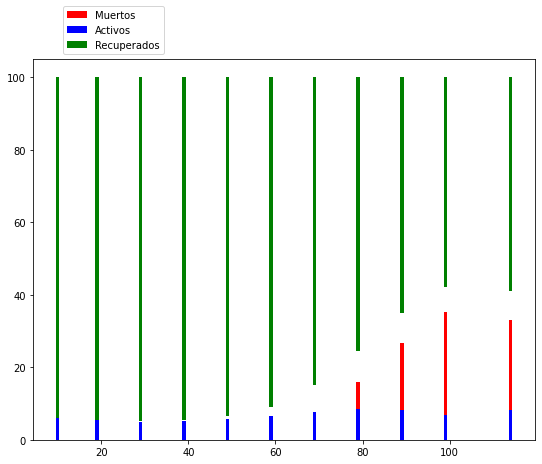

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
re=total_recuperados['Tasa_%-Recuperados']
ac=total_recuperados['Tasa_%-Activos']
de=total_recuperados['Tasa_%-Decesos']
ed=total_recuperados['Media']
plt.bar(ed,de,color="red",label="Muertos")
plt.bar(ed,ac,color="blue",label="Activos")
plt.bar(ed,re,color="green",bottom=[sum(data) for data in zip(de,ac)],label="Recuperados")
#plt.bar(year,data1,color="red",bottom=[sum(data) for data in zip(data2,data3)],label="C++")

plt.legend(loc="lower left",bbox_to_anchor=(0.05,1.0))
plt.show()


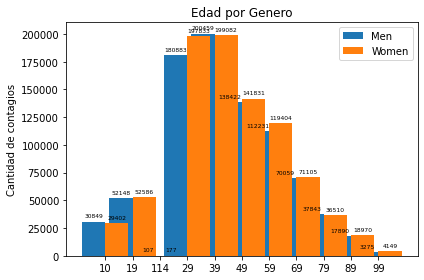

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = total_recuperados['Media']
men_means = total_recuperados['Masculino']
women_means = total_recuperados['Femenino']

x = np.arange(len(labels))  # the label locations
width = 0.85  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad de contagios')
ax.set_title('Edad por Genero')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=6)

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()


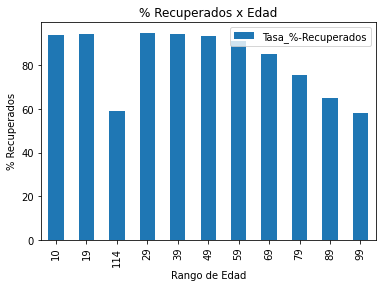

In [24]:
import matplotlib.pyplot as plt
total_recuperados.plot(kind='bar',x='Media',y='Tasa_%-Recuperados')
plt.title('% Recuperados x Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('% Recuperados')
plt.title('% Recuperados x Edad')
#plt.annotate(text='%',xy=(x,y))
plt.show()

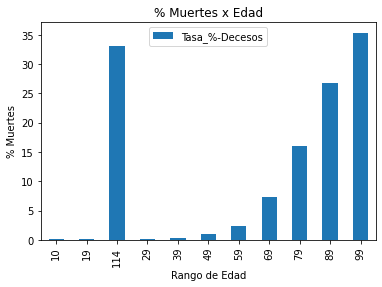

In [25]:
import matplotlib.pyplot as plt
total_recuperados.plot(kind='bar',x='Media',y='Tasa_%-Decesos')
plt.title('% Muertes x Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('% Muertes')
plt.show()

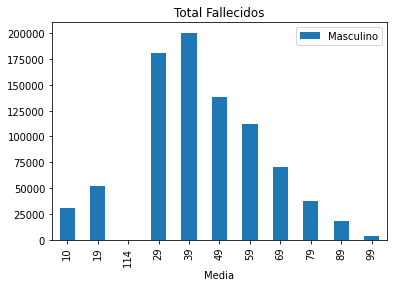

In [26]:
total_recuperados.plot(kind='bar',x='Media',y='Masculino')
plt.title('Total Fallecidos')
plt.show()

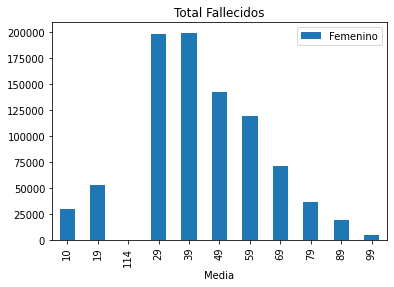

In [27]:
total_recuperados.plot(kind='bar',x='Media',y='Femenino')
plt.title('Total Fallecidos')
plt.show()

#Exportar a Excel
exportar=pd.ExcelWriter("Recuperación_Covid.xlsx")
total_recuperados.to_excel(exportar,sheet_name="Edad_Genero",float_format=True,header=True)
exportar.save()

##DESCRIPCION DE LOS CASOS COLUMNA Tipo de contagio POR SEXO Y EDAD.

In [28]:
df_contagio=df_cases[['Sexo','Edad','Tipo de contagio']].dropna()

In [29]:
total_columna=df_contagio.groupby(by='Tipo de contagio')['Edad'].sum()
total_columna


Tipo de contagio
EN ESTUDIO          484
En Estudio       503299
En estudio     62624009
Importado         92619
RELACIONADO        1830
Relacionado     5530207
Name: Edad, dtype: int32

In [30]:
def generof(fila):
    sexf=fila['Sexo']
    if sexf == 'F':
        resultado=1
        return resultado
    else:
        resultado=0
        return resultado
df_contagio['Femenino']=df_contagio.apply(generof,axis=1)


In [31]:
def generom(fila):
    sexm=fila['Sexo']
    if sexm =='M':
        respuesta=1
        return respuesta
    else:
        respuesta=0
        return respuesta
df_contagio['Masculino']=df_contagio.apply(generom,axis=1)


In [32]:
def cluster_edad(fila):
    decil=fila['Edad']
    if decil<=10:
        resultado="Cluster_0"
        return resultado
    else:
        if decil>=11 and decil<=19:
            resultado="Cluster_1"
            return resultado
        else:
            if decil>=20 and decil<=29:
                resultado="Cluster_2"
                return resultado
            else:
                if decil>=30 and decil<=39:
                    resultado="Cluster_3"
                    return resultado
                else:
                    if decil>=40 and decil<=49:
                        resultado="Cluster_4"
                        return resultado
                    else:
                        if decil>=50 and decil<=59:
                            resultado="Cluster_5"
                            return resultado
                        else:
                            if decil>=60 and decil<=69:
                                resultado="Cluster_6"
                                return resultado
                            else:
                                if decil>=70 and decil<=79:
                                    resultado="Cluster_7"
                                    return resultado
                                else:
                                    if decil>=80 and decil<=89:
                                        resultado="Cluster_8"
                                        return resultado
                                    else:
                                        if decil>=90 and decil<=99:
                                            resultado="Cluster_9"
                                            return resultado
                                        else:
                                            if decil>=100:
                                                resultado="Cluster_10"
                                                return resultado
                                 
   # return resultado
df_contagio['Rango_Edad']=df_contagio.apply(cluster_edad,axis=1)


In [33]:
def estudio(fila):
    c1=fila['Tipo de contagio']
    if c1=='EN ESTUDIO' or c1=='En Estudio' or c1=='En estudio':
        c1=1
        return c1
    else:
        c1=0
        return c1
df_contagio['En_Estudio']=df_contagio.apply(estudio,axis=1)

In [34]:
def importado(fila):
    c2=fila['Tipo de contagio']
    if c2=='Importado':
        c2=1
        return c2
    else:
        c2=0
        return c2
df_contagio['Importados']=df_contagio.apply(importado,axis=1)

In [35]:
def relacionado(fila):
    c3=fila['Tipo de contagio']
    if c3=='RELACIONADO' or c3=='Relacionado':
        c3=1
        return c3
    else:
        c3=0
        return c3
df_contagio['Relacionados']=df_contagio.apply(relacionado,axis=1)

In [36]:
df_contagio=df_contagio[['Rango_Edad',
                         'Edad','Sexo',
                         'Femenino',
                         'Masculino',
                         'Tipo de contagio',
                         'En_Estudio',
                         'Importados',
                         'Relacionados'
                        ]]
df_contagio

,Rango_Edad,Edad,Sexo,Femenino,Masculino,Tipo de contagio,En_Estudio,Importados,Relacionados
0,Cluster_1,19,F,1,0,Importado,0,1,0
1,Cluster_3,34,M,0,1,Importado,0,1,0
2,Cluster_5,50,F,1,0,Importado,0,1,0
3,Cluster_5,55,M,0,1,Relacionado,0,0,1
4,Cluster_2,25,M,0,1,Relacionado,0,0,1
...,...,...,...,...,...,...,...,...,...
1719766,Cluster_1,19,M,0,1,En estudio,1,0,0
1719767,Cluster_1,19,M,0,1,En estudio,1,0,0
1719768,Cluster_2,21,M,0,1,En estudio,1,0,0
1719769,Cluster_1,19,M,0,1,En estudio,1,0,0


In [37]:
total_contagios=df_contagio.groupby(by='Rango_Edad').agg({'Edad':'mean',
                                                          'Tipo de contagio':'count',
                                                          'Femenino':'sum',
                                                          'Masculino':'sum',
                                                          'En_Estudio':'sum',
                                                          'Importados':'sum',
                                                          'Relacionados':'sum'
                                                        })
total_contagios=total_contagios.rename(columns={'Edad':'Media','Tipo de contagio':'Total'})
total_contagios

,Media,Total,Femenino,Masculino,En_Estudio,Importados,Relacionados
Rango_Edad,,,,,,,
Cluster_0,5.716095,60323,29436,30887,54438,30,5855
Cluster_1,15.855015,104804,52615,52189,93915,72,10817
Cluster_10,101.920266,301,184,117,271,0,30
Cluster_2,24.979011,378909,197898,181011,344147,482,34280
Cluster_3,34.317544,399734,199169,200565,362042,576,37116
Cluster_4,44.150485,280533,141951,138582,256889,370,23274
Cluster_5,54.305879,232164,119648,112516,214966,363,16835
Cluster_6,63.954548,142063,71470,70593,132748,228,9087
Cluster_7,73.963694,75388,36912,38476,70489,83,4816


In [38]:
#Tasa Estudio
def tasa_Estudio(fila):
    tasa=(fila['En_Estudio']/fila['Total'])*100 #+str('%')
    return tasa
total_contagios['Tasa_%-D_Estudio']=total_contagios.apply(tasa_Estudio,axis=1)


In [39]:
#Tasa Estudio
def tasa_Importados(fila):
    tasa=(fila['Importados']/fila['Total'])*100 #+str('%')
    return tasa
total_contagios['Tasa_%-Importados']=total_contagios.apply(tasa_Importados,axis=1)


In [40]:
#Tasa Estudio
def tasa_Relacionados(fila):
    tasa=(fila['Relacionados']/fila['Total'])*100 #+str('%')
    return tasa
total_contagios['Tasa_%-Relacionados']=total_contagios.apply(tasa_Relacionados,axis=1)


In [41]:
total_contagios

,Media,Total,Femenino,Masculino,En_Estudio,Importados,Relacionados,Tasa_%-D_Estudio,Tasa_%-Importados,Tasa_%-Relacionados
Rango_Edad,,,,,,,,,,
Cluster_0,5.716095,60323,29436,30887,54438,30,5855,90.244185,0.049732,9.706082
Cluster_1,15.855015,104804,52615,52189,93915,72,10817,89.610129,0.068700,10.321171
Cluster_10,101.920266,301,184,117,271,0,30,90.033223,0.000000,9.966777
Cluster_2,24.979011,378909,197898,181011,344147,482,34280,90.825766,0.127207,9.047027
Cluster_3,34.317544,399734,199169,200565,362042,576,37116,90.570730,0.144096,9.285175
Cluster_4,44.150485,280533,141951,138582,256889,370,23274,91.571758,0.131892,8.296350
Cluster_5,54.305879,232164,119648,112516,214966,363,16835,92.592305,0.156355,7.251340
Cluster_6,63.954548,142063,71470,70593,132748,228,9087,93.443050,0.160492,6.396458
Cluster_7,73.963694,75388,36912,38476,70489,83,4816,93.501618,0.110097,6.388285


##UBICACION DEL CASO 

In [42]:
df_ubicacion=df_cases[['Edad','Sexo','Ubicación del caso']].dropna()

In [43]:
def cluster_edad(fila):
    decil=fila['Edad']
    if decil<=10:
        resultado="Cluster_0"
        return resultado
    else:
        if decil>=11 and decil<=19:
            resultado="Cluster_1"
            return resultado
        else:
            if decil>=20 and decil<=29:
                resultado="Cluster_2"
                return resultado
            else:
                if decil>=30 and decil<=39:
                    resultado="Cluster_3"
                    return resultado
                else:
                    if decil>=40 and decil<=49:
                        resultado="Cluster_4"
                        return resultado
                    else:
                        if decil>=50 and decil<=59:
                            resultado="Cluster_5"
                            return resultado
                        else:
                            if decil>=60 and decil<=69:
                                resultado="Cluster_6"
                                return resultado
                            else:
                                if decil>=70 and decil<=79:
                                    resultado="Cluster_7"
                                    return resultado
                                else:
                                    if decil>=80 and decil<=89:
                                        resultado="Cluster_8"
                                        return resultado
                                    else:
                                        if decil>=90 and decil<=99:
                                            resultado="Cluster_9"
                                            return resultado
                                        else:
                                            if decil>=100:
                                                resultado="Cluster_10"
                                                return resultado
                                 
   # return resultado
df_ubicacion['Rango_Edad']=df_ubicacion.apply(cluster_edad,axis=1)


In [44]:
def generof(fila):
    sexf=fila['Sexo']
    if sexf == 'F':
        resultado=1
        return resultado
    else:
        resultado=0
        return resultado
df_ubicacion['Femenino']=df_ubicacion.apply(generof,axis=1)

In [45]:
def generom(fila):
    sexm=fila['Sexo']
    if sexm == 'M':
        respuesta=1
        return respuesta
    else:
        respuesta=0
        return respuesta
df_ubicacion['Masculino']=df_ubicacion.apply(generom,axis=1)

In [46]:
def casa(fila):
    uc=fila['Ubicación del caso']
    if uc=='CASA' or uc=='Casa' or uc=='casa':
        home=1
        return home
    else:
        home=0
        return home
df_ubicacion['Casa']=df_ubicacion.apply(casa,axis=1)    


In [47]:
def fallecidos(fila):
    uf=fila['Ubicación del caso']
    if uf=='Fallecido':
        fa=1
        return fa
    else:
        fa=0
        return fa
df_ubicacion['Fallecidos']=df_ubicacion.apply(fallecidos,axis=1)

def hospitalizados(fila):
    uh=fila['Ubicación del caso']
    if uh=='Hospital':
        pa=1
        return pa
    else:
        pa=0
        return pa
df_ubicacion['Hospitalizados']=df_ubicacion.apply(hospitalizados,axis=1)

In [48]:
def ucis(fila):
    uu=fila['Ubicación del caso']
    if uu=='Hospital UCI' or uu=='Hospital':
        hu=1
        return hu
    else:
        hu=0
        return hu
      
df_ubicacion['Ucis']=df_ubicacion.apply(ucis,axis=1)   

In [49]:
df_ubicacion=df_ubicacion[['Edad','Rango_Edad','Sexo','Femenino','Masculino','Ubicación del caso','Casa','Fallecidos','Ucis']] #'Hospitalizados',
df_ubicacion

,Edad,Rango_Edad,Sexo,Femenino,Masculino,Ubicación del caso,Casa,Fallecidos,Ucis
0,19,Cluster_1,F,1,0,Casa,1,0,0
1,34,Cluster_3,M,0,1,Casa,1,0,0
2,50,Cluster_5,F,1,0,Casa,1,0,0
3,55,Cluster_5,M,0,1,Casa,1,0,0
4,25,Cluster_2,M,0,1,Casa,1,0,0
...,...,...,...,...,...,...,...,...,...
1719766,19,Cluster_1,M,0,1,Casa,1,0,0
1719767,19,Cluster_1,M,0,1,Casa,1,0,0
1719768,21,Cluster_2,M,0,1,Casa,1,0,0
1719769,19,Cluster_1,M,0,1,Casa,1,0,0


In [50]:
total_ubicacion=df_ubicacion.groupby(by='Rango_Edad').agg({'Edad':'mean',
                                                           'Ubicación del caso':'count',
                                                           'Femenino':'sum',
                                                           'Masculino':'sum',
                                                           'Casa':'sum',
                                                           'Fallecidos':'sum',
                                                           'Ucis':'sum'
                                                        }).reset_index() #'Hospitalizados':'sum'
total_ubicacion=total_ubicacion.rename(columns={'Edad':'Media','Ubicación del caso':'Total'})
total_ubicacion

,Rango_Edad,Media,Total,Femenino,Masculino,Casa,Fallecidos,Ucis
0,Cluster_0,5.718528,60237,29394,30843,58851,64,1322
1,Cluster_1,15.854734,104718,52580,52138,103885,63,770
2,Cluster_10,101.939716,282,175,107,174,94,14
3,Cluster_2,24.979116,378664,197810,180854,375855,478,2331
4,Cluster_3,34.317120,399476,199063,200413,395224,1148,3104
5,Cluster_4,44.149684,280170,141802,138368,274093,2537,3540
6,Cluster_5,54.303577,231477,119336,112141,220658,5655,5164
7,Cluster_6,63.949451,140932,71001,69931,125330,10286,5316
8,Cluster_7,73.953017,74112,36405,37707,58193,11910,4009
9,Cluster_8,83.610301,36636,18859,17777,24650,9864,2122


In [51]:
def porcentaje_casa(fila):
    t=fila['Total']
    c=fila['Casa']
    pc=(c/t)*100
    return pc
total_ubicacion['%_Casa']=total_ubicacion.apply(porcentaje_casa,axis=1)

In [52]:
def porcentaje_fallecidos(fila):
    t=fila['Total']
    f=fila['Fallecidos']
    pf=(f/t)*100
    return pf
total_ubicacion['%_Fallecidos']=total_ubicacion.apply(porcentaje_fallecidos,axis=1)

In [53]:
def porcentaje_ucis(fila):
    t=fila['Total']
    u=fila['Ucis']
    pu=(u/t)*100
    return pu
total_ubicacion['%_Ucis']=total_ubicacion.apply(porcentaje_ucis,axis=1)

In [54]:
total_ubicacion

,Rango_Edad,Media,Total,Femenino,Masculino,Casa,Fallecidos,Ucis,%_Casa,%_Fallecidos,%_Ucis
0,Cluster_0,5.718528,60237,29394,30843,58851,64,1322,97.699089,0.106247,2.194664
1,Cluster_1,15.854734,104718,52580,52138,103885,63,770,99.204530,0.060162,0.735308
2,Cluster_10,101.939716,282,175,107,174,94,14,61.702128,33.333333,4.964539
3,Cluster_2,24.979116,378664,197810,180854,375855,478,2331,99.258181,0.126233,0.615585
4,Cluster_3,34.317120,399476,199063,200413,395224,1148,3104,98.935606,0.287376,0.777018
5,Cluster_4,44.149684,280170,141802,138368,274093,2537,3540,97.830960,0.905522,1.263519
6,Cluster_5,54.303577,231477,119336,112141,220658,5655,5164,95.326102,2.443007,2.230891
7,Cluster_6,63.949451,140932,71001,69931,125330,10286,5316,88.929413,7.298555,3.772032
8,Cluster_7,73.953017,74112,36405,37707,58193,11910,4009,78.520348,16.070272,5.409380
9,Cluster_8,83.610301,36636,18859,17777,24650,9864,2122,67.283546,26.924337,5.792117


In [55]:
total_columna=df_cases.groupby(by='Ubicación del caso')['Edad'].sum()
total_columna

Ubicación del caso
CASA                 253
Casa            63673888
Fallecido        3113537
Hospital         1286661
Hospital UCI      184242
casa              118512
Name: Edad, dtype: int32

In [56]:
##DESCRIPCION DE LOS CASOS COLUMNA Estado POR SEXO Y EDAD.

In [57]:
total_columnaEstado=df_cases.groupby(by='Estado')['Edad'].sum()
total_columnaEstado

Estado
Fallecido     3113537
Grave          184242
LEVE               42
Leve         63792611
Moderado      1286266
moderado          395
Name: Edad, dtype: int32

In [58]:
df_estado=df_cases[['Edad','Sexo','Estado']].dropna()

In [59]:
def cluster_edad(fila):
    decil=fila['Edad']
    if decil<=10:
        resultado="Cluster_0"
        return resultado
    else:
        if decil>=11 and decil<=19:
            resultado="Cluster_1"
            return resultado
        else:
            if decil>=20 and decil<=29:
                resultado="Cluster_2"
                return resultado
            else:
                if decil>=30 and decil<=39:
                    resultado="Cluster_3"
                    return resultado
                else:
                    if decil>=40 and decil<=49:
                        resultado="Cluster_4"
                        return resultado
                    else:
                        if decil>=50 and decil<=59:
                            resultado="Cluster_5"
                            return resultado
                        else:
                            if decil>=60 and decil<=69:
                                resultado="Cluster_6"
                                return resultado
                            else:
                                if decil>=70 and decil<=79:
                                    resultado="Cluster_7"
                                    return resultado
                                else:
                                    if decil>=80 and decil<=89:
                                        resultado="Cluster_8"
                                        return resultado
                                    else:
                                        if decil>=90 and decil<=99:
                                            resultado="Cluster_9"
                                            return resultado
                                        else:
                                            if decil>=100:
                                                resultado="Cluster_10"
                                                return resultado
                                 
   # return resultado
df_estado['Rango_Edad']=df_estado.apply(cluster_edad,axis=1)


In [60]:
def generof(fila):
    sexf=fila['Sexo']
    if sexf == 'F':
        resultado=1
        return resultado
    else:
        resultado=0
        return resultado
df_estado['Femenino']=df_estado.apply(generof,axis=1)

In [61]:
def generom(fila):
    sexm=fila['Sexo']
    if sexm =='M':
        respuesta=1
        return respuesta
    else:
        respuesta=0
        return respuesta
df_estado['Masculino']=df_estado.apply(generom,axis=1)

In [62]:
def fallecidos(fila):
    uf=fila['Estado']
    if uf=='Fallecido':
        fa=1
        return fa
    else:
        fa=0
        return fa
df_estado['Fallecidos']=df_estado.apply(fallecidos,axis=1)

In [63]:
def leves(fila):
    l=fila['Estado']
    if l=='Leve' or l=='LEVE':
        le=1
        return le
    else:
        le=0
        return le
df_estado['Leves']=df_estado.apply(leves,axis=1)   

In [64]:
def moderados(fila):
    m=fila['Estado']
    if m=='moderado' or m=='Moderado':
        mo=1
        return mo 
    else:
        mo=0
        return mo
df_estado['Moderados']=df_estado.apply(moderados,axis=1)

In [65]:
def graves(fila):
    g=fila['Estado']
    if g=='Grave':
        gr=1
        return gr
    else:
        gr=0
        return gr 
df_estado['Graves']=df_estado.apply(graves,axis=1)

In [66]:
df_estado=df_estado[['Rango_Edad','Edad','Sexo','Femenino','Masculino','Estado','Leves','Moderados','Graves','Fallecidos']]

In [67]:
total_estado=df_estado.groupby(by='Rango_Edad').agg({'Edad':'mean',
                                                    'Estado':'count',
                                                    'Femenino':'sum',
                                                    'Masculino':'sum',
                                                    'Leves':'sum',
                                                    'Moderados':'sum',
                                                    'Graves':'sum',
                                                    'Fallecidos':'sum'
                                                    }).reset_index() #'Hospitalizados':'sum'
total_estado=total_estado.rename(columns={'Edad':'Media','Estado':'Total'})
total_estado

,Rango_Edad,Media,Total,Femenino,Masculino,Leves,Moderados,Graves,Fallecidos
0,Cluster_0,5.718528,60237,29394,30843,58851,1236,86,64
1,Cluster_1,15.854734,104718,52580,52138,103885,701,69,63
2,Cluster_10,101.939716,282,175,107,174,14,0,94
3,Cluster_2,24.979116,378664,197810,180854,375855,2186,145,478
4,Cluster_3,34.317120,399476,199063,200413,395224,2796,308,1148
5,Cluster_4,44.149684,280170,141802,138368,274093,3151,389,2537
6,Cluster_5,54.303577,231477,119336,112141,220658,4468,696,5655
7,Cluster_6,63.949451,140932,71001,69931,125330,4517,799,10286
8,Cluster_7,73.953017,74112,36405,37707,58193,3429,580,11910
9,Cluster_8,83.610301,36636,18859,17777,24650,1913,209,9864


In [68]:
def tasa_leves(fila):
    t=fila['Total']
    l=fila['Leves']
    tasa1=(l/t)*100
    return tasa1
total_estado['(%)casos-Leves']=total_estado.apply(tasa_leves,axis=1)

In [69]:
def tasa_graves(fila):
    t=fila['Total']
    g=fila['Graves']
    tasa2=(g/t)*100
    return tasa2
total_estado['(%)casos-Graves']=total_estado.apply(tasa_graves,axis=1)

In [70]:
def tasa_moderados(fila):
    t=fila['Total']
    l=fila['Moderados']
    tasa2=(l/t)*100
    return tasa2
total_estado['(%)casos-Moderados']=total_estado.apply(tasa_moderados,axis=1)

In [71]:
def tasa_fallecidos(fila):
    t=fila['Total']
    f=fila['Fallecidos']
    tasa3=(f/t)*100
    return tasa3
total_estado['(%)casos-Fallecidos']=total_estado.apply(tasa_fallecidos,axis=1)

In [72]:
total_estado

,Rango_Edad,Media,Total,Femenino,Masculino,Leves,Moderados,Graves,Fallecidos,(%)casos-Leves,(%)casos-Graves,(%)casos-Moderados,(%)casos-Fallecidos
0,Cluster_0,5.718528,60237,29394,30843,58851,1236,86,64,97.699089,0.142769,2.051895,0.106247
1,Cluster_1,15.854734,104718,52580,52138,103885,701,69,63,99.204530,0.065891,0.669417,0.060162
2,Cluster_10,101.939716,282,175,107,174,14,0,94,61.702128,0.000000,4.964539,33.333333
3,Cluster_2,24.979116,378664,197810,180854,375855,2186,145,478,99.258181,0.038293,0.577293,0.126233
4,Cluster_3,34.317120,399476,199063,200413,395224,2796,308,1148,98.935606,0.077101,0.699917,0.287376
5,Cluster_4,44.149684,280170,141802,138368,274093,3151,389,2537,97.830960,0.138844,1.124674,0.905522
6,Cluster_5,54.303577,231477,119336,112141,220658,4468,696,5655,95.326102,0.300678,1.930213,2.443007
7,Cluster_6,63.949451,140932,71001,69931,125330,4517,799,10286,88.929413,0.566940,3.205092,7.298555
8,Cluster_7,73.953017,74112,36405,37707,58193,3429,580,11910,78.520348,0.782599,4.626781,16.070272
9,Cluster_8,83.610301,36636,18859,17777,24650,1913,209,9864,67.283546,0.570477,5.221640,26.924337


##Tipo de Recuperación

In [73]:
total_columnaTipo=df_cases.groupby(by='Tipo de recuperación')['Edad'].sum()
total_columnaTipo

Tipo de recuperación
PCR        6844911
Tiempo    54200075
Name: Edad, dtype: int32

In [74]:
df_tiporecuperacion=df_cases[['Edad','Sexo','Tipo de recuperación']].dropna()

In [75]:
def cluster_edad(fila):
    decil=fila['Edad']
    if decil<=10:
        resultado="Cluster_0"
        return resultado
    else:
        if decil>=11 and decil<=19:
            resultado="Cluster_1"
            return resultado
        else:
            if decil>=20 and decil<=29:
                resultado="Cluster_2"
                return resultado
            else:
                if decil>=30 and decil<=39:
                    resultado="Cluster_3"
                    return resultado
                else:
                    if decil>=40 and decil<=49:
                        resultado="Cluster_4"
                        return resultado
                    else:
                        if decil>=50 and decil<=59:
                            resultado="Cluster_5"
                            return resultado
                        else:
                            if decil>=60 and decil<=69:
                                resultado="Cluster_6"
                                return resultado
                            else:
                                if decil>=70 and decil<=79:
                                    resultado="Cluster_7"
                                    return resultado
                                else:
                                    if decil>=80 and decil<=89:
                                        resultado="Cluster_8"
                                        return resultado
                                    else:
                                        if decil>=90 and decil<=99:
                                            resultado="Cluster_9"
                                            return resultado
                                        else:
                                            if decil>=100:
                                                resultado="Cluster_10"
                                                return resultado
                                 
   # return resultado
df_tiporecuperacion['Rango_Edad']=df_tiporecuperacion.apply(cluster_edad,axis=1)


In [76]:
def generof(fila):
    sexf=fila['Sexo']
    if sexf == 'F':
        resultado=1
        return resultado
    else:
        resultado=0
        return resultado
df_tiporecuperacion['Femenino']=df_tiporecuperacion.apply(generof,axis=1)

In [77]:
def generom(fila):
    sexm=fila['Sexo']
    if sexm == 'M':
        respuesta=1
        return respuesta
    else:
        respuesta=0
        return respuesta
df_tiporecuperacion['Masculino']=df_tiporecuperacion.apply(generom,axis=1)

In [78]:
def recuperados_pcr(fila):
    tr=fila['Tipo de recuperación']
    if tr=='PCR':
        recuperado=1
        return recuperado
        
    else:
        recuperado=0
        return recuperado
df_tiporecuperacion['Prueba_PCR']=df_tiporecuperacion.apply(recuperados_pcr,axis=1)

        
    

In [79]:
def recuperados_tiempo(fila):
    tr=fila['Tipo de recuperación']
    if tr=='Tiempo':
        recuperadot=1
        return recuperadot
    else:
        recuperadot=0
        return recuperadot
               
df_tiporecuperacion['Recuperado-Tiempo']=df_tiporecuperacion.apply(recuperados_tiempo,axis=1)


In [80]:
df_tiporecuperacion=df_tiporecuperacion[['Rango_Edad','Edad','Sexo','Femenino','Masculino','Tipo de recuperación','Prueba_PCR','Recuperado-Tiempo']]
df_tiporecuperacion

,Rango_Edad,Edad,Sexo,Femenino,Masculino,Tipo de recuperación,Prueba_PCR,Recuperado-Tiempo
0,Cluster_1,19,F,1,0,PCR,1,0
1,Cluster_3,34,M,0,1,PCR,1,0
2,Cluster_5,50,F,1,0,PCR,1,0
3,Cluster_5,55,M,0,1,PCR,1,0
4,Cluster_2,25,M,0,1,PCR,1,0
...,...,...,...,...,...,...,...,...
1701853,Cluster_2,27,F,1,0,PCR,1,0
1701856,Cluster_2,25,M,0,1,PCR,1,0
1702122,Cluster_0,2,F,1,0,PCR,1,0
1702767,Cluster_2,28,F,1,0,PCR,1,0


In [81]:
total_tipoRecuperacion=df_tiporecuperacion.groupby(by='Rango_Edad').agg({'Edad':'mean',
                                                                         'Tipo de recuperación':'count',
                                                                         'Femenino':'sum',
                                                                         'Masculino':'sum',
                                                                         'Prueba_PCR':'sum',
                                                                         'Recuperado-Tiempo':'sum'
                                                                        }).reset_index()
total_tipoRecuperacion=total_tipoRecuperacion.rename(columns={'Edad':'Media','Tipo de recuperación':'Total'})
total_tipoRecuperacion

,Rango_Edad,Media,Total,Femenino,Masculino,Prueba_PCR,Recuperado-Tiempo
0,Cluster_0,5.740158,56592,27700,28892,5458,51134
1,Cluster_1,15.858218,98884,49591,49293,9160,89724
2,Cluster_10,102.143713,167,110,57,18,149
3,Cluster_2,24.981611,359348,187362,171986,39464,319884
4,Cluster_3,34.309648,377593,187891,189702,44845,332748
5,Cluster_4,44.137696,261773,133014,128759,30740,231033
6,Cluster_5,54.272878,210827,109848,100979,23462,187365
7,Cluster_6,63.866658,119992,62274,57718,12821,107171
8,Cluster_7,73.840340,56182,29229,26953,5808,50374
9,Cluster_8,83.485535,23920,13369,10551,2601,21319


In [82]:
def tasa_recuperacionpcr(fila):
    p=fila['Prueba_PCR']
    t=fila['Total']
    tasa1=(p/t)*100 #+str('%')
    return tasa1
total_tipoRecuperacion['%-PCR']=total_tipoRecuperacion.apply(tasa_recuperacionpcr,axis=1)

In [83]:
def tasa_recuperaciontiempo(fila):
    r=fila['Recuperado-Tiempo']
    t=fila['Total']
    tasa2=(r/t)*100 #+str('%')
    return tasa2
total_tipoRecuperacion['%-Rec_tiempo']=total_tipoRecuperacion.apply(tasa_recuperaciontiempo,axis=1)

In [84]:
total_tipoRecuperacion

,Rango_Edad,Media,Total,Femenino,Masculino,Prueba_PCR,Recuperado-Tiempo,%-PCR,%-Rec_tiempo
0,Cluster_0,5.740158,56592,27700,28892,5458,51134,9.644473,90.355527
1,Cluster_1,15.858218,98884,49591,49293,9160,89724,9.263379,90.736621
2,Cluster_10,102.143713,167,110,57,18,149,10.778443,89.221557
3,Cluster_2,24.981611,359348,187362,171986,39464,319884,10.982112,89.017888
4,Cluster_3,34.309648,377593,187891,189702,44845,332748,11.876544,88.123456
5,Cluster_4,44.137696,261773,133014,128759,30740,231033,11.742999,88.257001
6,Cluster_5,54.272878,210827,109848,100979,23462,187365,11.128556,88.871444
7,Cluster_6,63.866658,119992,62274,57718,12821,107171,10.684879,89.315121
8,Cluster_7,73.840340,56182,29229,26953,5808,50374,10.337831,89.662169
9,Cluster_8,83.485535,23920,13369,10551,2601,21319,10.873746,89.126254


##Series Temporales

In [85]:
df_SeriesMensuales=pd.read_csv('SeriesMensuales.csv')
df_SeriesMensuales['Fecha']=pd.to_datetime(df_SeriesMensuales['Fecha'],errors='coerce')

In [86]:
df_SeriesMensuales.dtypes

Fecha              datetime64[ns]
Mes_Calendario              int64
Year_Calendario             int64
Mes-Year                   object
Mes-D                       int64
dtype: object

In [87]:
df_DifusionViral=df_cases.groupby(by=[pd.to_datetime(df_cases['Fecha de diagnóstico'],errors='coerce'),'Nombre departamento'
                                     ]).agg({'Nombre municipio':'count'}).reset_index()
df_DifusionViral=df_DifusionViral.rename(columns={'Nombre municipio':'Total'})                                     
#df_DifusionViral=pd.to_datetime(df_DifusionViral['Fecha de diagnóstico'],errors='coerce')
df_DifusionViral                                   

,Fecha de diagnóstico,Nombre departamento,Total
0,2020-01-04,ANTIOQUIA,6
1,2020-01-04,BARRANQUILLA,3
2,2020-01-04,BOGOTA,81
3,2020-01-04,CASANARE,1
4,2020-01-04,CAUCA,3
...,...,...,...
8550,2021-05-01,TOLIMA,390
8551,2021-05-01,VALLE,272
8552,2021-05-01,VAUPES,1
8553,2021-06-01,BOYACA,1


In [88]:
df_InicioSintomas=df_cases.groupby(by=[pd.to_datetime(df_cases['Fecha de inicio de síntomas'],errors='coerce'),'Nombre departamento'
                                     ]).agg({'Nombre municipio':'count'}).reset_index()
df_InicioSintomas=df_InicioSintomas.rename(columns={'Nombre municipio':'Total'})
df_InicioSintomas

,Fecha de inicio de síntomas,Nombre departamento,Total
0,2020-01-03,BOGOTA,3
1,2020-01-03,CARTAGENA,1
2,2020-01-03,VALLE,1
3,2020-01-04,ANTIOQUIA,12
4,2020-01-04,ATLANTICO,2
...,...,...,...
9220,2021-05-01,HUILA,1
9221,2021-05-01,NARIÑO,1
9222,2021-05-01,NORTE SANTANDER,1
9223,2021-05-01,PUTUMAYO,1


In [142]:
##Tiempo entre inicio de sintomas y diagnostico
df_TiempoDiagnostico=df_cases[['Fecha de inicio de síntomas','Fecha de diagnóstico']].dropna()
df_TiempoDiagnostico['Fecha de inicio de síntomas']=pd.to_datetime(df_TiempoDiagnostico['Fecha de inicio de síntomas'],errors='coerce') #,format='%d-%m-%Y'
df_TiempoDiagnostico['Fecha de diagnóstico']=pd.to_datetime(df_TiempoDiagnostico['Fecha de diagnóstico'],errors='coerce')
df_TiempoDiagnostico['Tiempo-Diagnost']=(df_TiempoDiagnostico['Fecha de diagnóstico']-df_TiempoDiagnostico['Fecha de inicio de síntomas']).astype("timedelta64[D]").round() # convierte en time delta dias
"""
def tiempodiagnostico(fila):
    fd=fila['Fecha de diagnóstico']
    fi=fila['Fecha de inicio de síntomas']
    if fi>fd:
        fe=0
        return fe
    else:
        fe=fd-fi
        return fe
df_TiempoDiagnostico['Tiempo-Diagnost']=df_TiempoDiagnostico.apply(tiempodiagnostico,axis=1)
df_TiempoDiagnostico['Tiempo-Diagnost']=pd.to_numeric(df_TiempoDiagnostico['Tiempo-Diagnost'],errors='coerce')

#df_TiempoDiagnostico['Tiempo-Diagnost']=pd.to_numeric(df_TiempoDiagnostico['Tiempo-Diagnost'],errors='coerce')
"""
df_TiempoDiagnostico


,Fecha de inicio de síntomas,Fecha de diagnóstico,Tiempo-Diagnost
0,2020-02-27,2020-06-03,97.0
1,2020-04-03,2020-09-03,153.0
2,2020-02-29,2020-09-03,187.0
3,2020-06-03,2020-11-03,153.0
4,2020-08-03,2020-11-03,92.0
...,...,...,...
1719766,2020-12-19,2021-03-01,72.0
1719767,2020-12-18,2021-02-01,45.0
1719768,2020-12-18,2021-02-01,45.0
1719769,2020-12-14,2020-12-31,17.0


In [143]:
df_TiempoDiagnostico['Tiempo-Diagnost'].sum()

20195578.0

In [148]:
import numpy as np
import datetime as dt
#Dia de la semana
#import datetime
def dias(fila):
    dia=fila['Fecha de diagnóstico']
    for i in range(len(df_TiempoDiagnostico)):
        diames=dia.isocalendar()
        return diames[2]
df_TiempoDiagnostico['Day-Week']=df_TiempoDiagnostico.apply(dias,axis=1)


In [149]:
#import datetime
#df_TiempoDiagnostico['Week_Year']=df_TiempoDiagnostico['Fecha de diagnóstico'].isocalendar([0][1])
def semanas(fila):
    sem=fila['Fecha de diagnóstico']
    for i in range(len(df_TiempoDiagnostico)):
        fechasemana=sem.isocalendar() #returna tupla(year,week,day)
        return fechasemana[1]
df_TiempoDiagnostico['Week']=df_TiempoDiagnostico.apply(semanas,axis=1)

#df_TiempoDiagnostico

In [144]:
# Tiempo transcurrido entre los sintomas y el diagnóstico                                strftime('%d') string
df_TiempoDiagnostico['Day-Month']=df_TiempoDiagnostico['Fecha de diagnóstico'].dt.day 
df_TiempoDiagnostico['Month-Year']=df_TiempoDiagnostico['Fecha de diagnóstico'].dt.month
df_TiempoDiagnostico['Year']=df_TiempoDiagnostico['Fecha de diagnóstico'].dt.year
df_TiempoDiagnostico

,Fecha de inicio de síntomas,Fecha de diagnóstico,Tiempo-Diagnost,Day-Month,Month-Year,Year
0,2020-02-27,2020-06-03,97.0,3,6,2020
1,2020-04-03,2020-09-03,153.0,3,9,2020
2,2020-02-29,2020-09-03,187.0,3,9,2020
3,2020-06-03,2020-11-03,153.0,3,11,2020
4,2020-08-03,2020-11-03,92.0,3,11,2020
...,...,...,...,...,...,...
1719766,2020-12-19,2021-03-01,72.0,1,3,2021
1719767,2020-12-18,2021-02-01,45.0,1,2,2021
1719768,2020-12-18,2021-02-01,45.0,1,2,2021
1719769,2020-12-14,2020-12-31,17.0,31,12,2020


In [151]:
def semana_d(fila):
    s=fila['Week']
    a=fila['Year']
    for i in range(len(df_TiempoDiagnostico)):
        if a==2021:
            w=53+s
            return w
        else:
            w=s
            return w
df_TiempoDiagnostico['Week-Period']=df_TiempoDiagnostico.apply(semana_d,axis=1)

In [152]:
def mes_d(fila):
    m=fila['Month-Year']
    a=fila['Year']
    for i in range(len(df_TiempoDiagnostico)):
        if a==2021:
            mo=12+m
            return mo
        else:
            mo=m
            return mo 
df_TiempoDiagnostico['Month-Period']=df_TiempoDiagnostico.apply(mes_d,axis=1) 

In [153]:
#series semanal
#Menor tiempo diagnostico
mt=0
#Mayor periodo
mp=58
sr_WeekDiag=df_TiempoDiagnostico[['Fecha de diagnóstico','Tiempo-Diagnost','Week','Week-Period']].dropna()
sr_WeekDiag=sr_WeekDiag.drop(sr_WeekDiag[sr_WeekDiag['Tiempo-Diagnost']<mt].index) #.index
sr_WeekDiag=sr_WeekDiag.drop(sr_WeekDiag[sr_WeekDiag['Week-Period']>mp].index)
#sr_TiempoDiagnostico['Tiempo-Diagnost']=pd.to_numeric(sr_TiempoDiagnostico['Tiempo-Diagnost'],downcast='float',errors='coerce')
#sr_TiempoDiagnostico['Tiempo-Diagnost'].astype(float)
sr_WeekDiag

,Fecha de diagnóstico,Tiempo-Diagnost,Week,Week-Period
0,2020-06-03,97.0,23,23
1,2020-09-03,153.0,36,36
2,2020-09-03,187.0,36,36
3,2020-11-03,153.0,45,45
4,2020-11-03,92.0,45,45
...,...,...,...,...
1719764,2021-02-01,44.0,5,58
1719767,2021-02-01,45.0,5,58
1719768,2021-02-01,45.0,5,58
1719769,2020-12-31,17.0,53,53


In [154]:
#SeriesMensuales
mt=0
mp=13
sr_MonthDiag=df_TiempoDiagnostico[['Fecha de diagnóstico','Tiempo-Diagnost','Month-Year','Month-Period']].dropna()
sr_MonthDiag=sr_MonthDiag.drop(sr_MonthDiag[sr_MonthDiag['Tiempo-Diagnost']<mt].index) #.index
sr_MonthDiag=sr_MonthDiag.drop(sr_MonthDiag[sr_MonthDiag['Month-Period']>mp].index)

sr_MonthDiag

,Fecha de diagnóstico,Tiempo-Diagnost,Month-Year,Month-Period
0,2020-06-03,97.0,6,6
1,2020-09-03,153.0,9,9
2,2020-09-03,187.0,9,9
3,2020-11-03,153.0,11,11
4,2020-11-03,92.0,11,11
...,...,...,...,...
1719727,2020-12-30,14.0,12,12
1719736,2020-12-31,15.0,12,12
1719741,2020-12-24,73.0,12,12
1719742,2020-12-24,73.0,12,12


In [157]:
##Consolidado de dias ranscurridos entre el inicio de los sintomas y la fecha de reporte 
data_WeekDiag=sr_WeekDiag.groupby(by='Week-Period').agg({'Week-Period':'mean',
                                                         'Fecha de diagnóstico':'count',
                                                         'Tiempo-Diagnost':'mean'
                                                        }).round(2)#.reset_index().round(2)
data_WeekDiag=data_WeekDiag.rename(columns={'Week-Period':'Semanas',
                                            'Fecha de diagnóstico':'NuevosContagios',
                                            'Tiempo-Diagnost':'DiasTranscurridos'})
data_WeekDiag

,Semanas,NuevosContagios,DiasTranscurridos
Week-Period,,,
1,1.0,6,1.00
2,2.0,1375,0.03
6,6.0,688,18.27
7,7.0,2399,12.48
10,10.0,531,37.20
11,11.0,4097,30.33
12,12.0,121,5.14
13,13.0,389,8.50
14,14.0,335,17.26


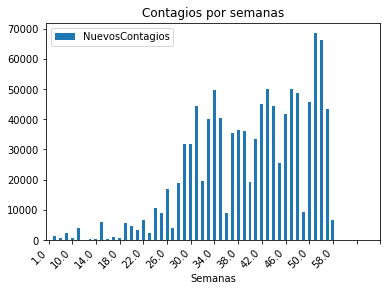

In [158]:
import matplotlib.pyplot as plt
data_WeekDiag.plot(kind='bar',x='Semanas',y='NuevosContagios',animated=True)
plt.title('Contagios por semanas')
serie=[0,4,8,12,16,20,24,28,32,36,40,44,48,52,56]
plt.xticks(serie,rotation=45,ha='right')
plt.show()

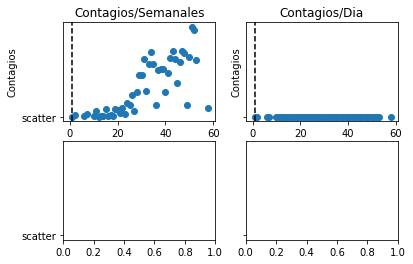

In [159]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
datos1=data_WeekDiag[['Semanas','NuevosContagios']]
datos2=data_WeekDiag[['Semanas','DiasTranscurridos']]
prom1=datos1.apply(np.mean)
prom2=datos2.apply(np.mean)
f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharey=True)

ax1.plot('scatter')
ax1.scatter(datos1.Semanas,datos1.NuevosContagios)
ax1.axvline(datos1.Semanas.all(),ymax=datos1.Semanas.max(),color='k',linestyle='--')
#ax1.axhline(datos1.NuevosContagios.item(),color='k',linestyle='--')
ax1.set_title('Contagios/Semanales')
ax1.set_xlabel('Semanas')
ax1.set_ylabel('Contagios')

ax2.plot('scatter')
ax2.scatter(datos2.Semanas,datos2.DiasTranscurridos)
ax2.axvline(datos2.Semanas.all(),ymax=datos2.Semanas.max(),color='k',linestyle='--')
#ax1.axhline(datos1.NuevosContagios.item(),color='k',linestyle='--')
ax2.set_title('Contagios/Dia')
ax2.set_xlabel('Semanas')
ax2.set_ylabel('Contagios')


plt.show()

In [160]:
data_MonthDiag=sr_MonthDiag.groupby(by='Month-Period').agg({'Month-Period':'max',
                                                            'Fecha de diagnóstico':'count',
                                                            'Tiempo-Diagnost':'mean'
                                                            }).round(2)#.reset_index().round(2)
data_MonthDiag= data_MonthDiag.rename(columns={'Month-Period':'Mes',
                                               'Fecha de diagnóstico':'NuevosContagios',
                                               'Tiempo-Diagnost':'DiasTranscurridos'
                               })
#data_WeekDiag.round(2)
data_MonthDiag

,Mes,NuevosContagios,DiasTranscurridos
Month-Period,,,
1,1,1381,0.03
2,2,3087,13.77
3,3,5321,28.19
4,4,8105,43.35
5,5,20090,40.10
6,6,42204,39.42
7,7,127514,43.47
8,8,156693,53.18
9,9,128505,61.01


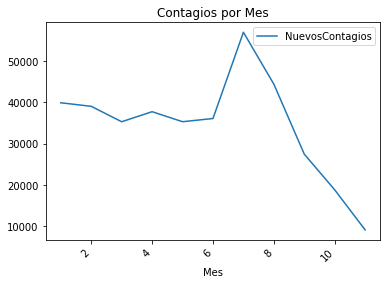

In [101]:
import matplotlib.pyplot as plt
data_MonthDiag.plot(kind='line',x='Mes',y='NuevosContagios',animated=True)
plt.title('Contagios por Mes')
plt.xticks(rotation=45,ha='right')
plt.show()

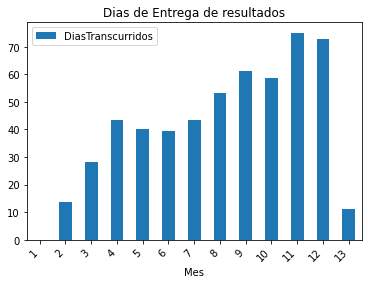

In [161]:
import matplotlib.pyplot as plt
data_MonthDiag.plot(kind='bar',x='Mes',y='DiasTranscurridos',animated=True)
plt.title('Dias de Entrega de resultados')
plt.xticks(rotation=45,ha='right')
plt.show()

In [103]:
#sr_TiempoDiagnostico.dtypes

In [104]:
df_TiempoDiagnostico.dtypes

Fecha de inicio de síntomas    datetime64[ns]
Fecha de diagnóstico           datetime64[ns]
Tiempo-Diagnost                       float64
Day-Week                                int64
Week                                    int64
Day-Month                               int64
Month-Year                              int64
Year                                    int64
Week-Period                             int64
Month-Period                            int64
dtype: object

In [105]:
df_TiempoDiagnostico.drop(df_TiempoDiagnostico[df_TiempoDiagnostico['Tiempo-Diagnost']==0].index)

,Fecha de inicio de síntomas,Fecha de diagnóstico,Tiempo-Diagnost,Day-Week,Week,Day-Month,Month-Year,Year,Week-Period,Month-Period
0,2020-02-27,2020-06-03,NaN,3,23,3,6,2020,23,6
1,2020-04-03,2020-09-03,NaN,4,36,3,9,2020,36,9
2,2020-02-29,2020-09-03,NaN,4,36,3,9,2020,36,9
3,2020-06-03,2020-11-03,NaN,2,45,3,11,2020,45,11
4,2020-08-03,2020-11-03,NaN,2,45,3,11,2020,45,11
...,...,...,...,...,...,...,...,...,...,...
1719766,2020-12-19,2021-03-01,NaN,1,9,1,3,2021,62,15
1719767,2020-12-18,2021-02-01,NaN,1,5,1,2,2021,58,14
1719768,2020-12-18,2021-02-01,NaN,1,5,1,2,2021,58,14
1719769,2020-12-14,2020-12-31,NaN,4,53,31,12,2020,53,12


In [106]:
#df_TiempoDiagnostico.drop(df_TiempoDiagnostico[df_TiempoDiagnostico['Tiempo-Diagnost']<0])
#df_prueba1
def eliminar(fila):
    t=fila['Tiempo-Diagnost']
    if t<0:
        d=''
        return d
    else:
        d=1
        return d
df_TiempoDiagnostico['eliminar']=df_TiempoDiagnostico.apply(eliminar,axis=1)
df_TiempoDiagnostico

,Fecha de inicio de síntomas,Fecha de diagnóstico,Tiempo-Diagnost,Day-Week,Week,Day-Month,Month-Year,Year,Week-Period,Month-Period,eliminar
0,2020-02-27,2020-06-03,NaN,3,23,3,6,2020,23,6,1
1,2020-04-03,2020-09-03,NaN,4,36,3,9,2020,36,9,1
2,2020-02-29,2020-09-03,NaN,4,36,3,9,2020,36,9,1
3,2020-06-03,2020-11-03,NaN,2,45,3,11,2020,45,11,1
4,2020-08-03,2020-11-03,NaN,2,45,3,11,2020,45,11,1
...,...,...,...,...,...,...,...,...,...,...,...
1719766,2020-12-19,2021-03-01,NaN,1,9,1,3,2021,62,15,1
1719767,2020-12-18,2021-02-01,NaN,1,5,1,2,2021,58,14,1
1719768,2020-12-18,2021-02-01,NaN,1,5,1,2,2021,58,14,1
1719769,2020-12-14,2020-12-31,NaN,4,53,31,12,2020,53,12,1


In [107]:

df_defuncion=df_cases[['Edad','Fecha de muerte']].dropna()
df_defuncion=df_defuncion[['Edad']]
#df_defuncion['contado']='Si'
def contabilizar(fila):
    contado=fila['Edad']
    if contado !='':
        return 'Si'
    else:
        return 'No'
    

df_defuncion['Reportado']=df_defuncion.apply(contabilizar,axis=1)
df_defuncion

,Edad,Reportado
151,65,Si
152,53,Si
156,88,Si
187,70,Si
196,58,Si
...,...,...
1701399,21,Si
1701809,49,Si
1702310,18,Si
1702311,76,Si


In [108]:

df_tiempos=df_cases[['ID de caso','Fecha de inicio de síntomas','Fecha de diagnóstico','Fecha de notificación','Fecha de muerte','fecha reporte web']].dropna()
#df_tiempos.dtypes

In [109]:

df_tiempos['Fecha de inicio de síntomas']=pd.to_datetime(df_tiempos['Fecha de inicio de síntomas'],errors='coerce') #,format='%d-%m-%Y'
df_tiempos['Fecha de diagnóstico']=pd.to_datetime(df_tiempos['Fecha de diagnóstico'],errors='coerce')
df_tiempos['Fecha de notificación']=pd.to_datetime(df_tiempos['Fecha de notificación'],errors='coerce')
df_tiempos['Fecha de muerte']=pd.to_datetime(df_tiempos['Fecha de muerte'],errors='coerce')
df_tiempos['fecha reporte web']=pd.to_datetime(df_tiempos['fecha reporte web'],errors='coerce')
df_tiempos.dtypes


ID de caso                             object
Fecha de inicio de síntomas    datetime64[ns]
Fecha de diagnóstico           datetime64[ns]
Fecha de notificación          datetime64[ns]
Fecha de muerte                datetime64[ns]
fecha reporte web              datetime64[ns]
dtype: object

#Exportar a Excel
exportar=pd.ExcelWriter("series_tiempos_Covid.xlsx")
df_tiempos.to_excel(exportar,sheet_name="Diferencia_tiempos",float_format=True,header=True)
exportar.save()

df_tiempos.head()

df_tiempos.min()

df_tiempos.max()

In [110]:

df_tiempos['Time-Diagnost']=df_tiempos['Fecha de diagnóstico']-df_tiempos['Fecha de inicio de síntomas']
df_tiempos['Time-Notif']=df_tiempos['Fecha de notificación']-df_tiempos['Fecha de inicio de síntomas']
df_tiempos['Time-Defunc']=df_tiempos['Fecha de muerte']-df_tiempos['Fecha de inicio de síntomas']
df_tiempos['Time-Report']=df_tiempos['fecha reporte web']-df_tiempos['Fecha de inicio de síntomas']
sr_diferidos=df_tiempos[['ID de caso','Fecha de inicio de síntomas','Time-Diagnost','Time-Notif','Time-Defunc','Time-Report']]
print('Tiempos transcurrido desde inicio de sintmomas hasta')
sr_diferidos

Tiempos transcurrido desde inicio de sintmomas hasta


,ID de caso,Fecha de inicio de síntomas,Time-Diagnost,Time-Notif,Time-Defunc,Time-Report
151,152,2020-10-03,-197 days,-199 days,-152 days,-197 days
152,153,2020-03-18,2 days,0 days,78 days,2 days
156,157,2020-12-03,-258 days,-258 days,-255 days,-258 days
187,188,2020-08-03,-135 days,-139 days,-134 days,-135 days
196,197,2020-06-03,-79 days,-82 days,-79 days,-79 days
...,...,...,...,...,...,...
1701399,"1,701,440",2020-10-12,77 days,66 days,140 days,201 days
1701809,"1,701,850",2020-12-12,14 days,3 days,79 days,140 days
1702310,"1,702,351",2020-12-13,15 days,4 days,109 days,139 days
1702311,"1,702,352",2020-12-13,15 days,4 days,50 days,139 days


sr_diferidos.dtypes

sr_diferidos['T-Defunc'].max()

df_tiempos.head()

In [111]:
#sr_diferido=df_tiempos['ID de caso']
sr_diagn=(df_tiempos['Fecha de diagnóstico']-df_tiempos['Fecha de inicio de síntomas'])
sr_notif=(df_tiempos['Fecha de notificación']-df_tiempos['Fecha de inicio de síntomas'])
sr_dead=(df_tiempos['Fecha de muerte']-df_tiempos['Fecha de inicio de síntomas'])
sr_reporte=(df_tiempos['fecha reporte web']-df_tiempos['Fecha de inicio de síntomas'])

In [112]:
df_test=df_cases[['ID de caso','Recuperado','Tipo de recuperación']].dropna()
df_test

,ID de caso,Recuperado,Tipo de recuperación
0,1,Recuperado,PCR
1,2,Recuperado,PCR
2,3,Recuperado,PCR
3,4,Recuperado,PCR
4,5,Recuperado,PCR
...,...,...,...
1701853,"1,701,894",Recuperado,PCR
1701856,"1,701,897",Recuperado,PCR
1702122,"1,702,163",Recuperado,PCR
1702767,"1,702,808",Recuperado,PCR


In [113]:
total_edad=df_gen_edad.groupby(by='Rango_Edad').agg({'Recuperado':'count',
                                                'Edad':'mean',
                                                'Alentados':'sum',
                                                'Activos':'sum',
                                                'Fallecidos':'sum'
                                               }).reset_index()
#+df_edad.groupby('Recuperado')['Edad'].mean()
total_edad=total_edad.rename(columns={'Recuperado':'Cant_Infect', 'Edad':'Edad_Promedio'})
print('Contagios por edad')
print(total_edad)

Contagios por edad
    Rango_Edad  Cant_Infect  Edad_Promedio  Alentados  Activos  Fallecidos
0    Cluster_0        60251       5.718096      56592     3595          64
1    Cluster_1       104734      15.854775      98884     5787          63
2   Cluster_10          284     101.933099        167       23          94
3    Cluster_2       378716      24.979122     359348    18890         478
4    Cluster_3       399541      34.317189     377593    20800        1148
5    Cluster_4       280253      44.149875     261773    15943        2537
6    Cluster_5       231635      54.304086     210827    15153        5655
7    Cluster_6       141164      63.950341     119992    10886       10286
8    Cluster_7        74353      73.954931      56182     6261       11910
9    Cluster_8        36860      83.611394      23920     3076        9864
10   Cluster_9         7424      92.472656       4300      500        2624


"""
total_recuperado=df_edad.groupby(by='Recuperado')['Edad'].sum()
total_recuperado

In [114]:

total_defuncion=df_defuncion.groupby(by='Edad').agg({'Reportado':'count',
                                                    # 'Edad':'mean'
                                                    }).reset_index()
total_defuncion=total_defuncion.rename(columns={'Reportado':'Cant_Decesos','Edad':'Edad_Prom_Def'})
print('Total Decesos')
total_defuncion

Total Decesos


,Edad_Prom_Def,Cant_Decesos
0,1,25
1,2,24
2,3,19
3,4,17
4,5,12
...,...,...
103,104,13
104,105,6
105,106,1
106,107,2


In [115]:

total_gen_edad=df_gen_edad.groupby(by='Rango_Edad').agg({'Femenino':'sum',
                                                         'Masculino':'sum',
                                                         'Edad':'mean',
                                                         'Recuperado':'count'
                                                        }).reset_index()
total_gen_edad=total_gen_edad.rename(columns={'Recuperado':'Total','Edad':'Edad_Prom'})
print('Total Genero/Edad')
total_gen_edad
#df_gen_edad

Total Genero/Edad


,Rango_Edad,Femenino,Masculino,Edad_Prom,Total
0,Cluster_0,29402,30849,5.718096,60251
1,Cluster_1,52586,52148,15.854775,104734
2,Cluster_10,177,107,101.933099,284
3,Cluster_2,197833,180883,24.979122,378716
4,Cluster_3,199082,200459,34.317189,399541
5,Cluster_4,141831,138422,44.149875,280253
6,Cluster_5,119404,112231,54.304086,231635
7,Cluster_6,71105,70059,63.950341,141164
8,Cluster_7,36510,37843,73.954931,74353
9,Cluster_8,18970,17890,83.611394,36860


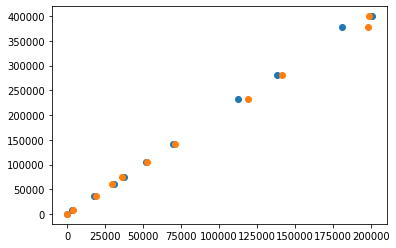

In [116]:
import matplotlib.pyplot as plt 
import seaborn as sns
#plt.pie(x=total_gen_edad.Femenino,labels=total_gen_edad[0]) 
plt.scatter(x=total_gen_edad.Masculino,y=total_gen_edad.Total)
plt.scatter(x=total_gen_edad.Femenino,y=total_gen_edad.Total)
#sns.displot(df.total_gen_edad['Masculino'])
#sns.displot(df.total_gen_edad['Femenino'])
plt.show()

(-0.14344735399513214, 1.143447353995132)

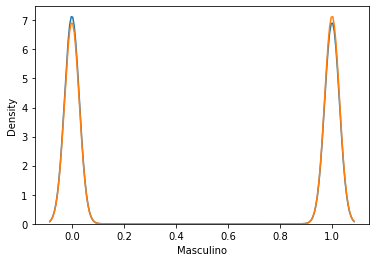

In [117]:
sns.kdeplot(df_gen_edad['Masculino'])
sns.kdeplot(df_gen_edad['Femenino'])
plt.xlim()

In [119]:
df_gen_edad.to_csv('DataClustering.csv',index=False)
df_contagio.to_csv('ReporteContagios.csv',index=False)
df_ubicacion.to_csv('DataUbicacionCaso.csv',index=False)
df_estado.to_csv('DataEstadosPacientes.csv',index=False)
df_tiporecuperacion.to_csv('DataTipoRecuperacion.csv',index=False)
df_TiempoDiagnostico.to_csv('TiempoDiagnosticos.csv',index=False)
sr_WeekDiag.to_csv('SerieTemporalSemanal.csv',index=False)
sr_MonthDiag.to_csv('SerieTemporalMensual.csv',index=False)
df_TiempoDiagnostico.to_csv('DataTiemposDiagnosticos.csv',index=False)
df_tiempos.to_csv('DataTiemposSintomaticos.csv',index=False)
sr_diferidos.to_csv('DataTiemposSeriealesDiferidos.csv',index=False)
sr_diagn.to_csv('SeriesTemporalesDiagnosticos.csv',index=False)
sr_notif.to_csv('SeriesTemporalesNotificacion.csv',index=False)
sr_dead.to_csv('SeriesTemporalesMuertes.csv',index=False)
sr_reporte.to_csv('SeriesTemporalesReportes.csv',index=False)
df_test.to_csv('DataPruebas.csv',index=False)


In [124]:
total_recuperados.to_excel('TotalConsolidados.xlsx',index=False)
total_columna.to_excel('PromediosColumnas.xlsx',index=False)
total_contagios.to_excel('ConsolidadoContagios.xlsx',index=False)
#total_ubicacion.to_Excel('UbicacionCasos.xlsx',index=False)
total_columnaEstado.to_excel('ConsolidadoEstadosEnfermos.xlsx',index=False)
total_estado.to_excel('ConsolidadoEnfermos.xlsx',index=False)
total_columnaTipo.to_excel('TotalTipo.xlsx',index=False)
total_tipoRecuperacion.to_excel('ConsolidadoRecuperaciones.xlsx',index=False)
df_DifusionViral.to_excel('DataDifusionViral.xlsx',index=False)
df_InicioSintomas.to_excel('SerialesSintomatologicos.xlsx',index=False)
data_WeekDiag.to_excel('SerializacionSemanalDiagnostico.xlsx',index=False)
df_defuncion.to_excel('DataDefunciones.xlsx',index=False)
total_edad.to_excel('TotalxEdades.xlsx',index=False)
